In [1]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
def get_tickets_close(tickets):
    info = yfinance.download(tickers = tickets, interval ='1d',start='2016-01-01', end ='2021-10-01', groub_by = 'ticker',auto_adjust = True, treads = True)['Close']
    return info

In [3]:
BTC = ["BTC-USD"]
BTC = get_tickets_close(BTC)
BTC.tail()

[*********************100%***********************]  1 of 1 completed


Date
2021-09-27    42235.730469
2021-09-28    41034.542969
2021-09-29    41564.363281
2021-09-30    43790.894531
2021-10-01    48116.941406
Name: Close, dtype: float64

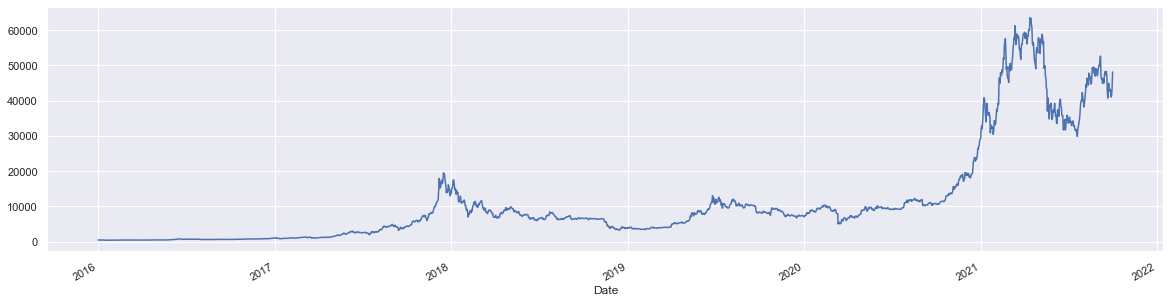

In [4]:
BTC.plot(figsize=(20,5))
plt.show()

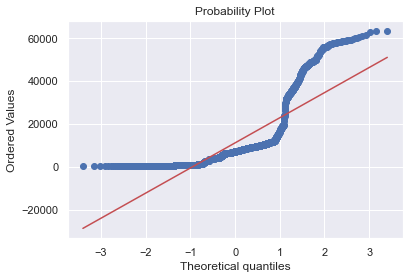

In [5]:
scipy.stats.probplot(BTC, plot = pylab)
pylab.show()

In [6]:
BTC_returns = pd.DataFrame(BTC.pct_change(1).mul(100))
BTC_returns = BTC_returns[1:]
BTC_returns

,Close
Date,
2016-01-02,-0.206299
2016-01-03,-0.790656
2016-01-04,0.716265
2016-01-05,-0.261149
2016-01-06,-0.660936
...,...
2021-09-27,-2.251427
2021-09-28,-2.844008
2021-09-29,1.291157


# Analysis

In [7]:
sts.adfuller(BTC)

(-0.09247106336874614,
 0.9501833003892406,
 26,
 2070,
 {'1%': -3.4335130085587595,
  '5%': -2.8629372728285363,
  '10%': -2.5675138439636864},
 33355.965889151936)

In [8]:
sts.adfuller(BTC_returns)

(-47.01354638003943,
 0.0,
 0,
 2095,
 {'1%': -3.433475217426538,
  '5%': -2.8629205871719057,
  '10%': -2.567504959814537},
 11600.572073448006)

# Encontrar el modelo que mejor se ajuste

In [9]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [10]:
model_ar_1_i_1_ma_1 = ARIMA(BTC, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2096
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16906.058
Method:                       css-mle   S.D. of innovations            770.414
Date:                Sun, 03 Oct 2021   AIC                          33820.115
Time:                        17:40:40   BIC                          33842.706
Sample:                             1   HQIC                         33828.390
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7487     16.353      1.391      0.164      -9.303      54.801
ar.L1.D.Close    -0.5459      0.270     -2.023      0.043      -1.075      -0.017
ma.L1.D.Close     0.5023      0.278      1.804      0.071      -0.043       1.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8318           +0.0000j            1.8318            0.5000
MA.1           -1.9908           +0.0000j            1.9908            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
model_ar_2_i_1_ma_1 = ARIMA(BTC, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
results_ar_2_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2096
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -16904.718
Method:                       css-mle   S.D. of innovations            769.921
Date:                Sun, 03 Oct 2021   AIC                          33819.435
Time:                        17:40:40   BIC                          33847.674
Sample:                             1   HQIC                         33829.779
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.8773     17.560      1.303      0.193     -11.539      57.294
ar.L1.D.Close     0.4949      0.269      1.840      0.066      -0.032       1.022
ar.L2.D.Close     0.0622      0.022      2.792      0.005       0.019       0.106
ma.L1.D.Close    -0.5375      0.269     -1.998      0.046      -1.065      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6700           +0.0000j            1.6700            0.0000
AR.2           -9.6205           +0.0000j            9.6205            0.5000
MA.1            1.8604           +0.0000j            1.8604            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
model_ar_3_i_1_ma_1 = ARIMA(BTC, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_4_i_1_ma_1 = ARIMA(BTC, order=(4,1,1))
results_ar_4_i_1_ma_1 = model_ar_4_i_1_ma_1.fit()
model_ar_5_i_1_ma_1 = ARIMA(BTC, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
model_ar_6_i_1_ma_1 = ARIMA(BTC, order=(6,1,1))
results_ar_6_i_1_ma_1 = model_ar_6_i_1_ma_1.fit()
model_ar_7_i_1_ma_1 = ARIMA(BTC, order=(7,1,1))
results_ar_7_i_1_ma_1 = model_ar_7_i_1_ma_1.fit()
model_ar_8_i_1_ma_1 = ARIMA(BTC, order=(8,1,1))
results_ar_8_i_1_ma_1 = model_ar_8_i_1_ma_1.fit()

In [13]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(4,1,1):  \t LL = ", results_ar_4_i_1_ma_1.llf, "\t AIC = ", results_ar_4_i_1_ma_1.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,1):  \t LL = ", results_ar_6_i_1_ma_1.llf, "\t AIC = ", results_ar_6_i_1_ma_1.aic)
print("ARIMA(7,1,1):  \t LL = ", results_ar_7_i_1_ma_1.llf, "\t AIC = ", results_ar_7_i_1_ma_1.aic)
print("ARIMA(8,1,1):  \t LL = ", results_ar_8_i_1_ma_1.llf, "\t AIC = ", results_ar_8_i_1_ma_1.aic)

ARIMA(1,1,1):  	 LL =  -16906.057582007008 	 AIC =  33820.115164014016
ARIMA(2,1,1):  	 LL =  -16904.717576700627 	 AIC =  33819.43515340125
ARIMA(3,1,1):  	 LL =  -16904.60309375988 	 AIC =  33821.20618751976
ARIMA(4,1,1):  	 LL =  -16903.532467535482 	 AIC =  33821.064935070965
ARIMA(5,1,1):  	 LL =  -16903.42547634055 	 AIC =  33822.8509526811
ARIMA(6,1,1):  	 LL =  -16903.423757377666 	 AIC =  33824.84751475533
ARIMA(7,1,1):  	 LL =  -16903.184786238515 	 AIC =  33826.36957247703
ARIMA(8,1,1):  	 LL =  -16899.405980057156 	 AIC =  33820.81196011431


In [14]:
model_ar_1_i_1_ma_2 = ARIMA(BTC, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(BTC, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_1_i_1_ma_4 = ARIMA(BTC, order=(1,1,4))
results_ar_1_i_1_ma_4 = model_ar_1_i_1_ma_4.fit()
model_ar_1_i_1_ma_5 = ARIMA(BTC, order=(1,1,5))
results_ar_1_i_1_ma_5 = model_ar_1_i_1_ma_5.fit()
model_ar_1_i_1_ma_6 = ARIMA(BTC, order=(1,1,6))
results_ar_1_i_1_ma_6 = model_ar_1_i_1_ma_6.fit()
model_ar_1_i_1_ma_7 = ARIMA(BTC, order=(1,1,7))
results_ar_1_i_1_ma_7 = model_ar_1_i_1_ma_7.fit()
model_ar_1_i_1_ma_8 = ARIMA(BTC, order=(1,1,8))
results_ar_1_i_1_ma_8 = model_ar_1_i_1_ma_8.fit()

In [15]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(1,1,4):  \t LL = ", results_ar_1_i_1_ma_4.llf, "\t AIC = ", results_ar_1_i_1_ma_4.aic)
print("ARIMA(1,1,5):  \t LL = ", results_ar_1_i_1_ma_5.llf, "\t AIC = ", results_ar_1_i_1_ma_5.aic)
print("ARIMA(1,1,6):  \t LL = ", results_ar_1_i_1_ma_6.llf, "\t AIC = ", results_ar_1_i_1_ma_6.aic)
print("ARIMA(1,1,7):  \t LL = ", results_ar_1_i_1_ma_7.llf, "\t AIC = ", results_ar_1_i_1_ma_7.aic)
print("ARIMA(1,1,8):  \t LL = ", results_ar_1_i_1_ma_8.llf, "\t AIC = ", results_ar_1_i_1_ma_8.aic)

ARIMA(1,1,1):  	 LL =  -16906.057582007008 	 AIC =  33820.115164014016
ARIMA(1,1,2):  	 LL =  -16904.612753370915 	 AIC =  33819.22550674183
ARIMA(1,1,3):  	 LL =  -16904.494114682326 	 AIC =  33820.98822936465
ARIMA(1,1,4):  	 LL =  -16903.35537797298 	 AIC =  33820.71075594596
ARIMA(1,1,5):  	 LL =  -16903.30622716288 	 AIC =  33822.61245432576
ARIMA(1,1,6):  	 LL =  -16903.30497299573 	 AIC =  33824.60994599146
ARIMA(1,1,7):  	 LL =  -16902.397436066913 	 AIC =  33824.794872133825
ARIMA(1,1,8):  	 LL =  -16898.86245761262 	 AIC =  33819.72491522524


In [16]:
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2096
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16906.058
Method:                       css-mle   S.D. of innovations            770.414
Date:                Sun, 03 Oct 2021   AIC                          33820.115
Time:                        17:40:59   BIC                          33842.706
Sample:                             1   HQIC                         33828.390
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7487     16.353      1.391      0.164      -9.303      54.801
ar.L1.D.Close    -0.5459      0.270     -2.023      0.043      -1.075      -0.017
ma.L1.D.Close     0.5023      0.278      1.804      0.071      -0.043       1.048
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8318           +0.0000j            1.8318            0.5000
MA.1           -1.9908           +0.0000j            1.9908            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_2_i_1_ma_1, DF = 1)))


LLR test p-value = 0.102


In [18]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_2_i_1_ma_1, results_ar_3_i_1_ma_1, DF = 1)))


LLR test p-value = 0.632


In [19]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_3_i_1_ma_1, results_ar_3_i_1_ma_1, DF = 1)))


LLR test p-value = 1.0


In [20]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_4_i_1_ma_1, results_ar_5_i_1_ma_1, DF = 1)))


LLR test p-value = 0.644


In [21]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_1, DF = 1)))


LLR test p-value = 0.953


In [22]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_7_i_1_ma_1, results_ar_8_i_1_ma_1, DF = 1)))


LLR test p-value = 0.006


In [23]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_2_i_1_ma_1, results_ar_8_i_1_ma_1, DF = 6)))


LLR test p-value = 0.101


El mejor modelo según un p-value del 5% es el de ARIMA(8,1,1)

In [24]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_2, DF = 1)))


LLR test p-value = 0.089


In [25]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3, DF = 1)))


LLR test p-value = 0.626


In [26]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_1_i_1_ma_4, DF = 1)))


LLR test p-value = 0.131


In [27]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_4, results_ar_1_i_1_ma_5, DF = 1)))


LLR test p-value = 0.754


In [28]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_5, results_ar_1_i_1_ma_6, DF = 1)))


LLR test p-value = 0.96


In [29]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_6, results_ar_1_i_1_ma_7, DF = 1)))


LLR test p-value = 0.178


In [30]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_7, results_ar_1_i_1_ma_8, DF = 1)))


LLR test p-value = 0.008


In [31]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_7, DF = 5)))


LLR test p-value = 0.489


In [32]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_8, DF = 6)))


LLR test p-value = 0.074


"Según log likelihood test, el mejor modelo es el ARIMA(1,1,8)

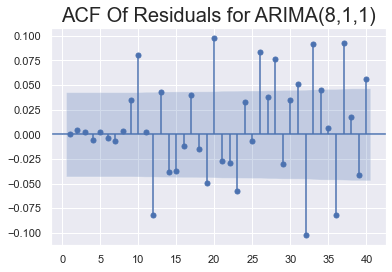

In [33]:
BTC['res_ar_8_i_1_ma_1'] = results_ar_8_i_1_ma_1.resid
sgt.plot_acf(BTC.res_ar_8_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(8,1,1)",size=20)
plt.show()

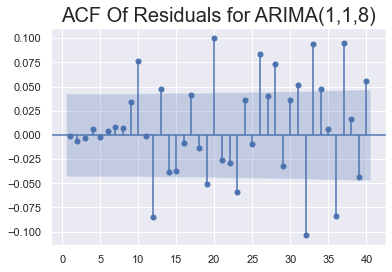

In [34]:
BTC['res_ar_1_i_1_ma_8'] = results_ar_1_i_1_ma_8.resid
sgt.plot_acf(BTC.res_ar_1_i_1_ma_8, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,8)",size=20)
plt.show()

[*********************100%***********************]  1 of 1 completed


Date
2021-09-27    42235.730469
2021-09-28    41034.542969
2021-09-29    41564.363281
2021-09-30    43790.894531
2021-10-01    48116.941406
Name: Close, dtype: float64